In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,10)

import seaborn as sns


df = pd.read_csv('DOH COVID Data Drop_ 20211005 - 04 Case Information.csv')

print(df.shape,'\n')

print(df.dtypes)

(2613070, 22) 

CaseCode              object
Age                  float64
AgeGroup              object
Sex                   object
DateSpecimen          object
DateResultRelease     object
DateRepConf           object
DateDied              object
DateRecover           object
RemovalType           object
Admitted              object
RegionRes             object
ProvRes               object
CityMunRes            object
CityMuniPSGC          object
BarangayRes           object
BarangayPSGC          object
HealthStatus          object
Quarantined           object
DateOnset             object
Pregnanttab           object
ValidationStatus      object
dtype: object


In [2]:
df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C907343,46.0,45 to 49,FEMALE,2020-05-12,2020-05-24,2020-05-28,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C221714,26.0,25 to 29,MALE,2020-07-22,2020-07-24,2020-08-01,NaN,NaN,RECOVERED,...,NCR,CITY OF MANILA,PH133910000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
2,C902043,32.0,30 to 34,FEMALE,2020-06-25,2020-07-06,2020-07-08,NaN,2020-07-13,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,NaN
3,C168921,22.0,20 to 24,FEMALE,2020-07-16,2020-07-18,2020-07-22,NaN,NaN,RECOVERED,...,NCR,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
4,C727313,21.0,20 to 24,MALE,2020-08-03,2020-08-06,2020-08-09,NaN,NaN,RECOVERED,...,NCR,CITY OF MARIKINA,PH137402000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."


<AxesSubplot:>

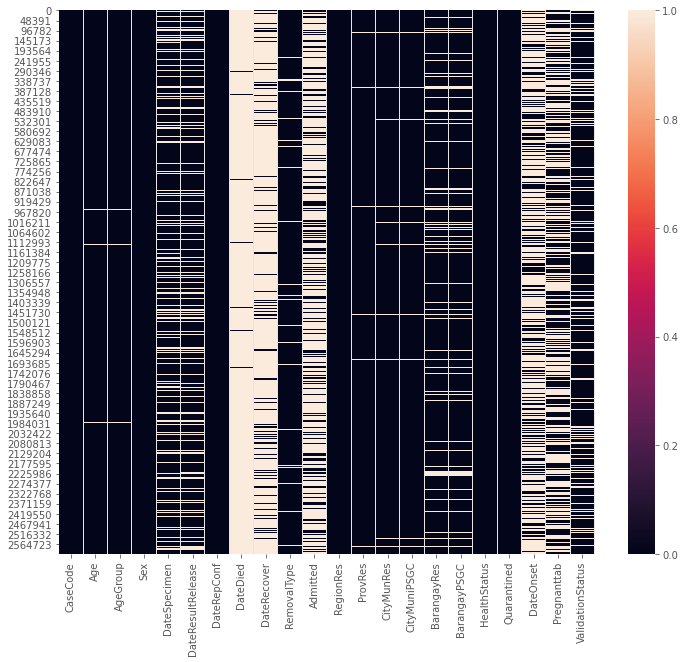

In [3]:
sns.heatmap(df[df.columns].isnull())

In [4]:
for column in df.columns:
    print(f'{column} - {round(np.mean(df[column].isnull()) * 100)}%')

CaseCode - 0%
Age - 0%
AgeGroup - 0%
Sex - 0%
DateSpecimen - 19%
DateResultRelease - 18%
DateRepConf - 0%
DateDied - 99%
DateRecover - 83%
RemovalType - 4%
Admitted - 71%
RegionRes - 0%
ProvRes - 2%
CityMunRes - 2%
CityMuniPSGC - 2%
BarangayRes - 11%
BarangayPSGC - 11%
HealthStatus - 0%
Quarantined - 0%
DateOnset - 65%
Pregnanttab - 50%
ValidationStatus - 20%


In [5]:
df.dropna(thresh=df.shape[0]*0.7, how='all', axis=1, inplace = True)
df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,RemovalType,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,ValidationStatus
0,C907343,46.0,45 to 49,FEMALE,2020-05-12,2020-05-24,2020-05-28,RECOVERED,NCR,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C221714,26.0,25 to 29,MALE,2020-07-22,2020-07-24,2020-08-01,RECOVERED,NCR,NCR,CITY OF MANILA,PH133910000,NaN,NaN,RECOVERED,NO,"Health Status is ""Recovered"", but no Date Reco..."
2,C902043,32.0,30 to 34,FEMALE,2020-06-25,2020-07-06,2020-07-08,RECOVERED,Region VIII: Eastern Visayas,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN
3,C168921,22.0,20 to 24,FEMALE,2020-07-16,2020-07-18,2020-07-22,RECOVERED,NCR,NCR,NaN,NaN,NaN,NaN,RECOVERED,NO,"Health Status is ""Recovered"", but no Date Reco..."
4,C727313,21.0,20 to 24,MALE,2020-08-03,2020-08-06,2020-08-09,RECOVERED,NCR,NCR,CITY OF MARIKINA,PH137402000,NaN,NaN,RECOVERED,NO,"Removal Type is ""Recovered"", but no Recovered ..."


In [6]:
df.drop(['DateSpecimen', 'DateResultRelease', 'RemovalType', 'ProvRes', 'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'ValidationStatus'], axis = 1, inplace = True)
df

,CaseCode,Age,AgeGroup,Sex,DateRepConf,RegionRes,CityMunRes,HealthStatus,Quarantined
0,C907343,46.0,45 to 49,FEMALE,2020-05-28,NCR,NaN,RECOVERED,NO
1,C221714,26.0,25 to 29,MALE,2020-08-01,NCR,CITY OF MANILA,RECOVERED,NO
2,C902043,32.0,30 to 34,FEMALE,2020-07-08,Region VIII: Eastern Visayas,NaN,RECOVERED,NO
3,C168921,22.0,20 to 24,FEMALE,2020-07-22,NCR,NaN,RECOVERED,NO
4,C727313,21.0,20 to 24,MALE,2020-08-09,NCR,CITY OF MARIKINA,RECOVERED,NO
...,...,...,...,...,...,...,...,...,...
2613065,C48945534,11.0,10 to 14,MALE,2021-06-21,Region IV-B: MIMAROPA,QUEZON,RECOVERED,YES
2613066,C14618667,45.0,45 to 49,MALE,2021-05-16,Region IV-B: MIMAROPA,TAYTAY,RECOVERED,YES
2613067,C71738420,37.0,35 to 39,FEMALE,2021-05-25,Region IV-B: MIMAROPA,TAYTAY,RECOVERED,YES
2613068,C12500660,58.0,55 to 59,FEMALE,2021-08-09,Region IV-B: MIMAROPA,CULION,RECOVERED,NO


In [7]:
cases = df.groupby(['HealthStatus']).size()
cases

HealthStatus
ASYMPTOMATIC      11785
CRITICAL           1275
DIED              38828
MILD              81201
MODERATE           5823
RECOVERED       2471165
SEVERE             2993
dtype: int64

In [8]:
pd.DataFrame({'Confirmed': [cases.sum()],
             'Deaths': [cases[2]],
             'Recovered': [cases[5]],
             'Active': [cases[[0,1,3,4,6]].sum()]})

,Confirmed,Deaths,Recovered,Active
0,2613070,38828,2471165,103077


In [9]:
regional = df.groupby(['RegionRes', 'HealthStatus']).size()
regional

RegionRes                 HealthStatus
BARMM                     ASYMPTOMATIC       82
                          CRITICAL            2
                          DIED              395
                          MILD              529
                          MODERATE           40
                                          ...  
Region XII: SOCCSKSARGEN  DIED              955
                          MILD             1431
                          MODERATE          412
                          RECOVERED       52201
                          SEVERE             82
Length: 126, dtype: int64

In [10]:
regional_case = []
for region in df.RegionRes.dropna().unique():
    regional_case.append({'Confirmed': regional[region].sum(), 'Deaths': regional[region][2],
                          'Recovered': regional[region][5], 'Active': regional[region][[0,1,3,4,6]].sum()}#,
                          #ignore_index = True)
         )

In [11]:
regional_cases = pd.DataFrame(regional_case, index = [df.RegionRes.dropna().unique()])
regional_cases.sort_values('Confirmed', ascending = False, inplace = True)

In [12]:
regional_cases

,Confirmed,Deaths,Recovered,Active
NCR,819080,9679,787234,22167
Region IV-A: CALABARZON,470993,4853,451496,14644
Region III: Central Luzon,261658,5275,245438,10945
Region VII: Central Visayas,145103,3967,136921,4215
Region VI: Western Visayas,138789,2825,129907,6057
Region II: Cagayan Valley,114192,1902,105313,6977
Region XI: Davao Region,97629,1551,91596,4482
Region I: Ilocos Region,92532,1550,83093,7889
Region X: Northern Mindanao,80971,904,77572,2495
CAR,76570,1129,69633,5808


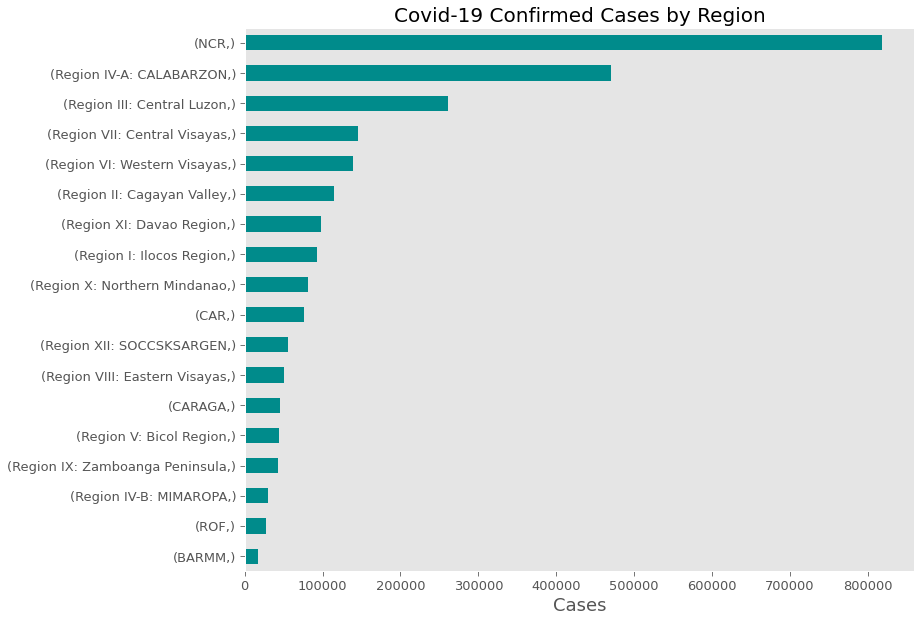

In [13]:
regional_cases.sort_values('Confirmed')['Confirmed'].plot(kind = 'barh',color="darkcyan")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Confirmed Cases by Region",fontsize=20)
plt.grid(alpha=0.3)

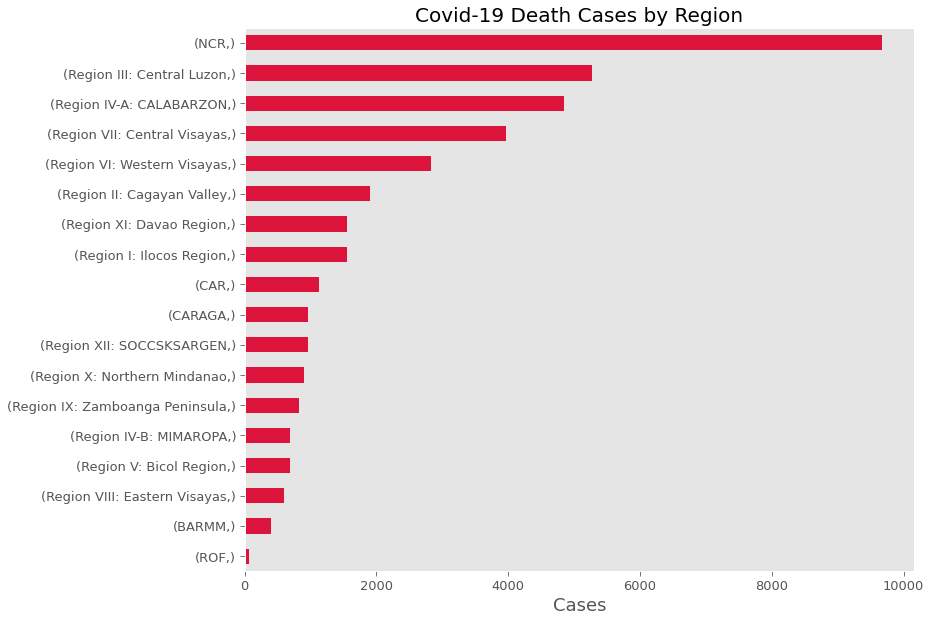

In [14]:
regional_cases.sort_values('Deaths')['Deaths'].plot(kind = 'barh',color="crimson")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Death Cases by Region",fontsize=20)
plt.grid(alpha=0.3)

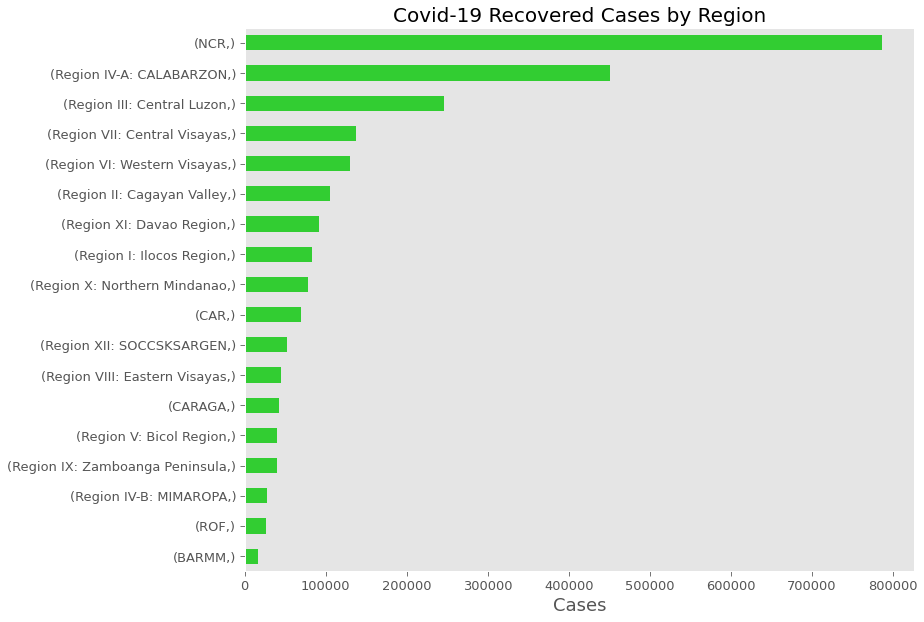

In [15]:
regional_cases.sort_values('Recovered')['Recovered'].plot(kind = 'barh',color="limegreen")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Recovered Cases by Region",fontsize=20)
plt.grid(alpha=0.3)

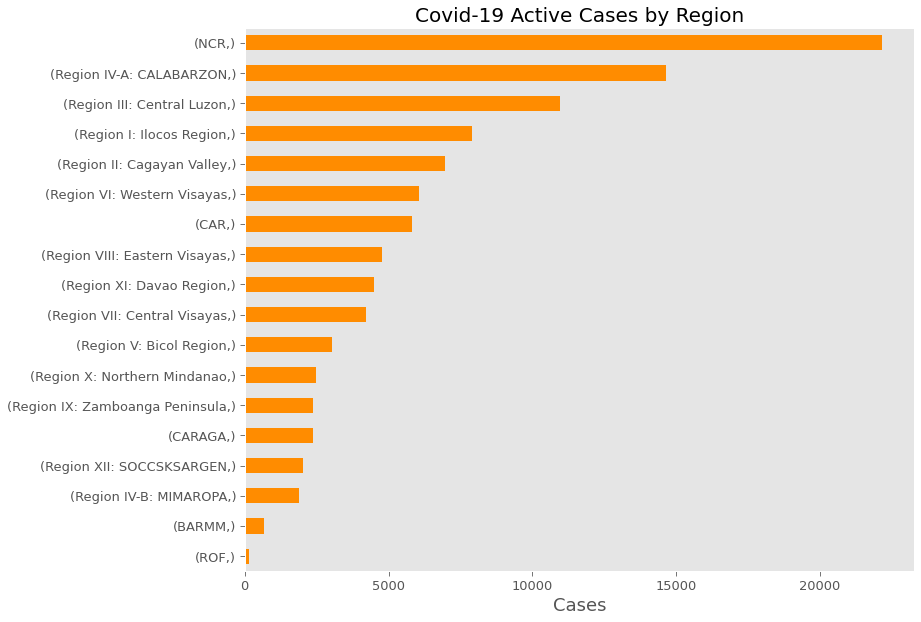

In [16]:
regional_cases.sort_values('Active')['Active'].plot(kind = 'barh',color="darkorange")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Active Cases by Region",fontsize=20)
plt.grid(alpha=0.3)

In [17]:
regional_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.951168,0.999949,0.953582
Deaths,0.951168,1.000000,0.949418,0.924669
Recovered,0.999949,0.949418,1.000000,0.950722
Active,0.953582,0.924669,0.950722,1.000000


In [18]:
age_groups = df.groupby(['AgeGroup', 'HealthStatus']).size()
age_groups

AgeGroup  HealthStatus
0 to 4    ASYMPTOMATIC      324
          CRITICAL           17
          DIED              321
          MILD             2278
          MODERATE          105
                          ...  
80+       DIED             5223
          MILD             2201
          MODERATE          349
          RECOVERED       37534
          SEVERE            227
Length: 119, dtype: int64

In [19]:
agegroup_case = []
for group in df.AgeGroup.dropna().unique():
    agegroup_case.append({'Confirmed': age_groups[group].sum(), 'Deaths': age_groups[group][2],
                          'Recovered': age_groups[group][5], 'Active': age_groups[group][[0,1,3,4,6]].sum()}#,
                          #ignore_index = True)
         )

In [20]:
ageGroup_cases = pd.DataFrame(agegroup_case, index = [df.AgeGroup.dropna().unique()])
ageGroup_cases.sort_values('Confirmed', ascending = False, inplace = True)

In [21]:
ageGroup_cases

,Confirmed,Deaths,Recovered,Active
25 to 29,364356,583,351983,11790
30 to 34,324686,818,312854,11014
20 to 24,267837,320,258415,9102
35 to 39,251305,1112,241425,8768
40 to 44,217705,1548,208410,7747
45 to 49,181398,2177,172411,6810
50 to 54,170404,3180,160465,6759
55 to 59,152649,4101,141734,6814
60 to 64,121256,5013,110670,5573
15 to 19,118626,166,113310,5150


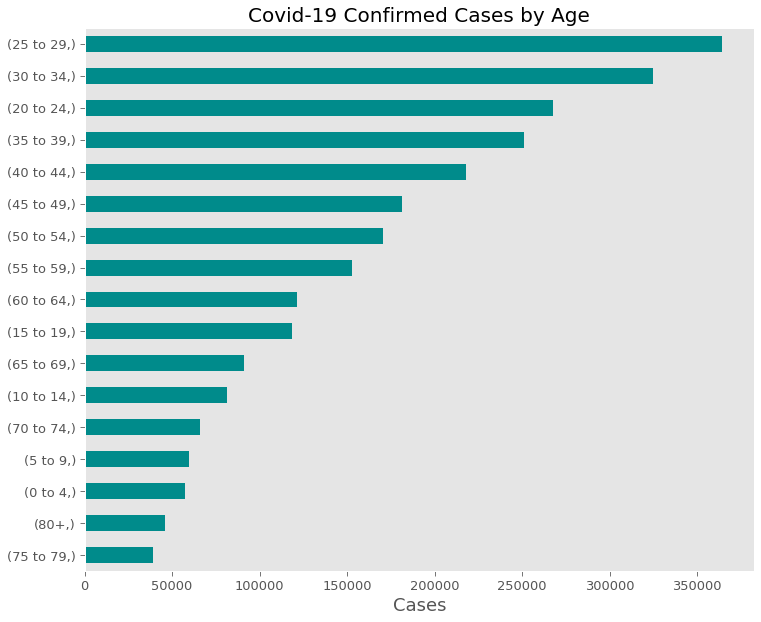

In [22]:
ageGroup_cases.sort_values('Confirmed')['Confirmed'].plot(kind = 'barh',color="darkcyan")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Confirmed Cases by Age",fontsize=20)
plt.grid(alpha=0.3)

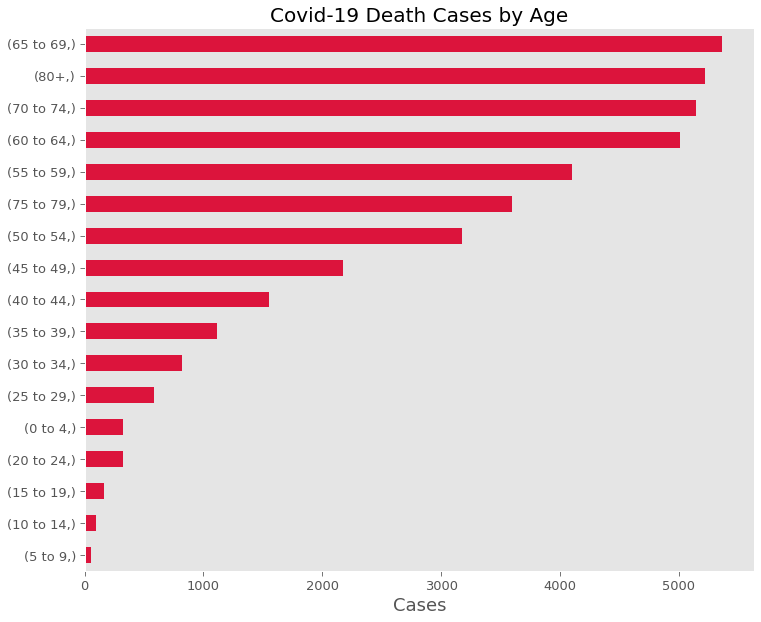

In [23]:
ageGroup_cases.sort_values('Deaths')['Deaths'].plot(kind = 'barh',color="crimson")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Death Cases by Age",fontsize=20)
plt.grid(alpha=0.3)

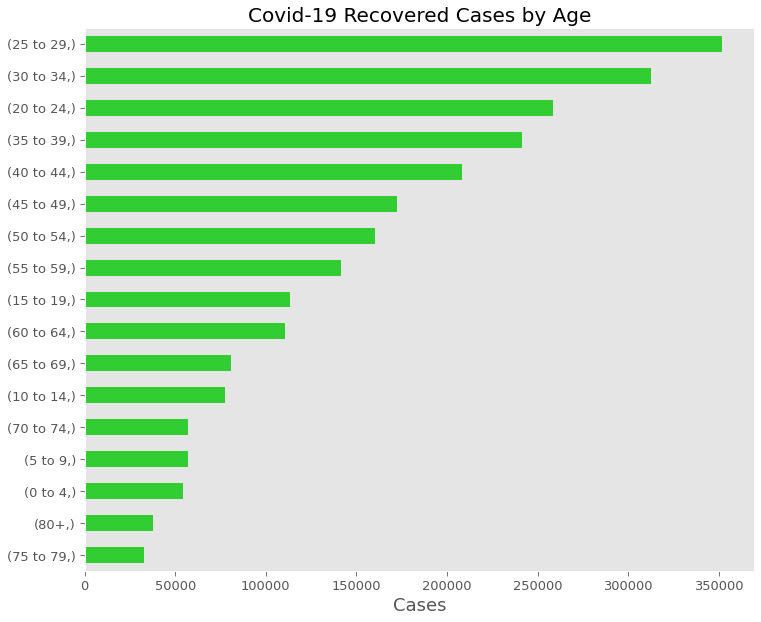

In [24]:
ageGroup_cases.sort_values('Recovered')['Recovered'].plot(kind = 'barh',color="limegreen")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Recovered Cases by Age",fontsize=20)
plt.grid(alpha=0.3)

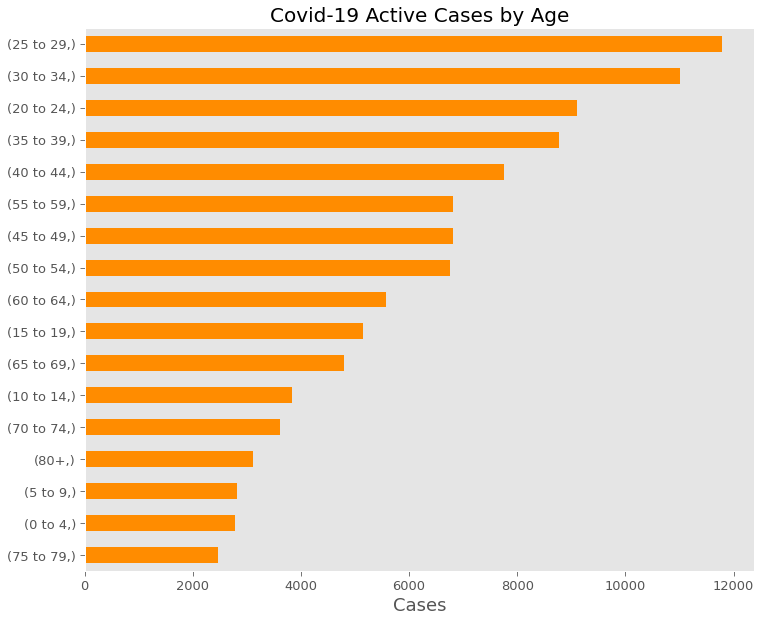

In [25]:
ageGroup_cases.sort_values('Active')['Active'].plot(kind = 'barh',color="darkorange")

plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Cases",fontsize=18)
plt.title("Covid-19 Active Cases by Age",fontsize=20)
plt.grid(alpha=0.3)

In [26]:
ageGroup_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,-0.404451,0.999760,0.992373
Deaths,-0.404451,1.000000,-0.424286,-0.317901
Recovered,0.999760,-0.424286,1.000000,0.989944
Active,0.992373,-0.317901,0.989944,1.000000


In [27]:
sex_groups = df.groupby(['Sex', 'HealthStatus']).size()
sex_groups

Sex     HealthStatus
FEMALE  ASYMPTOMATIC       6107
        CRITICAL            549
        DIED              16995
        MILD              43087
        MODERATE           3046
        RECOVERED       1228913
        SEVERE             1378
MALE    ASYMPTOMATIC       5678
        CRITICAL            726
        DIED              21833
        MILD              38114
        MODERATE           2777
        RECOVERED       1242252
        SEVERE             1615
dtype: int64

In [28]:
sexgroup_case = []
for sex in df.Sex.dropna().unique():
    sexgroup_case.append({'Confirmed': sex_groups[sex].sum(), 'Deaths': sex_groups[sex][2],
                          'Recovered': sex_groups[sex][5], 'Active': sex_groups[sex][[0,1,3,4,6]].sum()}#,
                          #ignore_index = True)
         )

In [29]:
sexGroup_cases = pd.DataFrame(sexgroup_case, index = [df.Sex.dropna().unique()])
sexGroup_cases.sort_values('Confirmed', ascending = False, inplace = True)

In [30]:
sexGroup_cases

,Confirmed,Deaths,Recovered,Active
MALE,1312995,21833,1242252,48910
FEMALE,1300075,16995,1228913,54167


In [31]:
sexGroup_cases.loc[['FEMALE', 'MALE'], 'Confirmed']

FEMALE    1300075
MALE      1312995
Name: Confirmed, dtype: int64